<a href="https://colab.research.google.com/github/llai7/MATH227C/blob/main/Math227C20Sp_P10_LuluLai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem set 10

## Part I

The concept that all our estimators have their own distribution, and therefore their own standard deviation, seems like a new concept but we are already familiar with one example:

For $N_{\rm obs}$ normal random variables with mean $\mu$ and standard deviation $\sigma$, our estimate of the mean, $\hat{\mu}$, has a distribution with standard deviation $\sigma/\sqrt{N_{\rm obs}}$. In reality, we do not know $\mu$ or $\sigma$ (if we did, why would we be estimating them!), so we approximate the standard deviation of $\hat{mu}$ with $\hat{\sigma}/\sqrt{N_{\rm obs}}$. This is called the __standard error of the mean__.

In this problem, we will explore whether the nonparametric bootstrap estimate of the standard deviation of $\hat{mu}$ agrees with the familiar formula of the standard error of the mean.


### 1.1 A single nonparametric bootstrap

The following code generates a sample of $N_{\rm obs}=20$ normal random variables.


In [9]:
set.seed(1)
NObs <- 20

[1] 170.5199 180.3221 167.9889 197.4029 182.0870 168.1723 183.9979 187.0337
 [9] 185.0670 174.4048 196.3926 182.8171 170.5830 151.3021 191.7117 177.5563
[17] 177.9041 189.5204 188.0368 185.2862

__(a)__ Perform a non-parametric boostrap, with 1000 resamplings, on the above data and estimate the mean $\hat{\mu}$ and the standard deviation $\hat{\sigma}$ each time. Output the standard deviation of $\hat{\mu}$. (In this block, the sample size is fixed at $N_{\rm obs}=20$.)

In [70]:
NResample <- 1000

# initialize an array to store all the estimates
rate_hatArray <-0
sd_array <-0

for (iResample in 1:NResample){

    NObservations <- 20
    observations = rexp(NObservations,rate=2.63)
    resampledObservations <- sample(observations, size=NObservations, replace = TRUE)
   
    # parameter estimation technique goes here
    rate_hat <- mean(resampledObservations)
    rate_hatArray[iResample] = rate_hat

    sd_array_temp <- sd(resampledObservations)
    sd_array[iResample] = sd_array_temp
    
}

sd(rate_hatArray)

[1] 0.1196429

__(b)__ Repeat the above, but in a loop, with $N_{\rm obs}$ ranging from 10 to 10000. (This is a big loop. If it is slow on your computational machine, feel free to skip, e.g., every tenth or 20th value of $N_{\rm obs}$.) Compute the standard deviation of $\hat{\mu}$ from non-parametric bootstrap for each value of $N_{\rm obs}$. Store the value of $\hat{\sigma}$ for each value of $N_{\rm obs}$ (because you will need it below).

Plot the standard deviation of $\hat{\mu}$ from non-parametric bootstrap versus $N_{\rm obs}$.

On the same axis, plot $\hat{\sigma}/\sqrt{N_{\rm obs}}$ versus $N_{\rm obs}$.

Do they agree?

In [76]:
sd_list <-list()
sd_mu <- list()


for (n in seq(10,10000,by=50)){
  NResample <- 1000
  rate_hatArray <-0

  for (iResample in 1:NResample){
    #print(n)
    NObservations <- n
    observations = rexp(NObservations,rate=2.63)
    resampledObservations <- sample(observations, size=NObservations, replace = TRUE)
   
    # parameter estimation technique goes here
    rate_hat <- mean(resampledObservations)
    rate_hatArray[iResample] = rate_hat

  }
      sd_list <- c(sd_list, sd(resampledObservations))
      sd_mu <- c(sd_mu, sd(rate_hatArray))
}

In [77]:
length(sd_mu)

[1] 200

In [80]:
data_frame <-
  data.frame(
    Nobs = seq(10,10000,by=50),
    sd_mu = unlist(sd_mu),
    sd = unlist(sd_list)/sqrt(seq(10,10000,by=50))
  )

In [64]:
library(ggplot2)

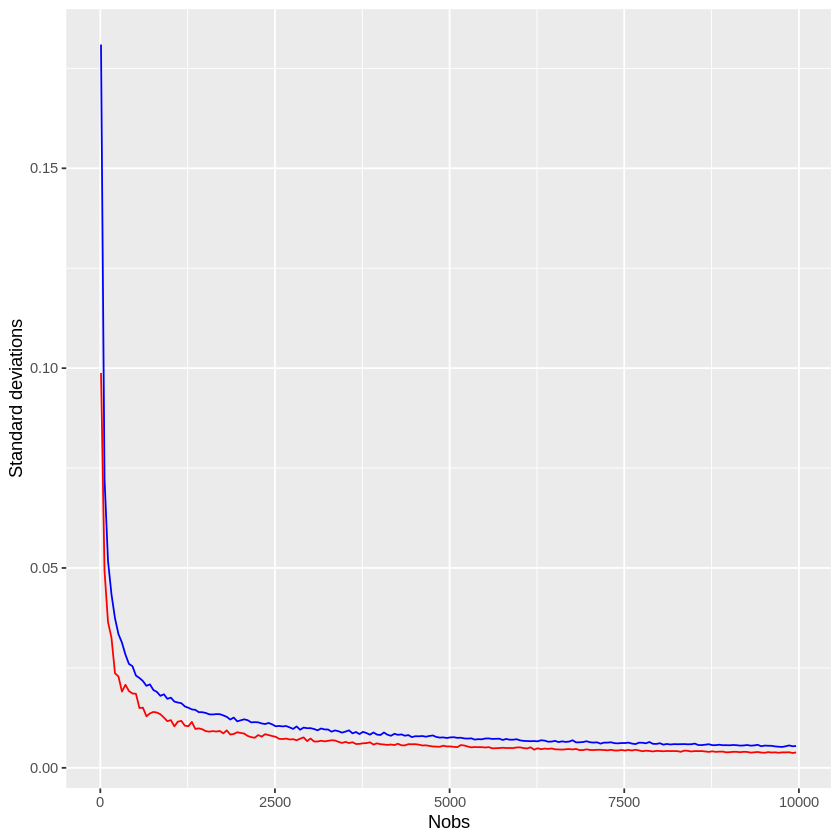

In [81]:
p = ggplot() + 
  geom_line(data = data_frame, aes(x = Nobs, y = sd_mu), color = "blue") +
  geom_line(data = data_frame, aes(x = Nobs, y = sd), color = "red") +
  xlab('Nobs') +
  ylab('Standard deviations')

print(p)

The two don't seem to be exactly the same but the overall trend agrees with each other in my opinion.

## Part II: Bootstrap on coefficient of linear regression

__(Out of class)__

__(EXAMPLE IS IDENTICAL TO IN-CLASS NOTEBOOK)__

The code below simulates some linear data with noise. Linear regression using lm will yield estimates for the parameters beta0 and beta1 (and sigma, which we will not focus on in this problem). 

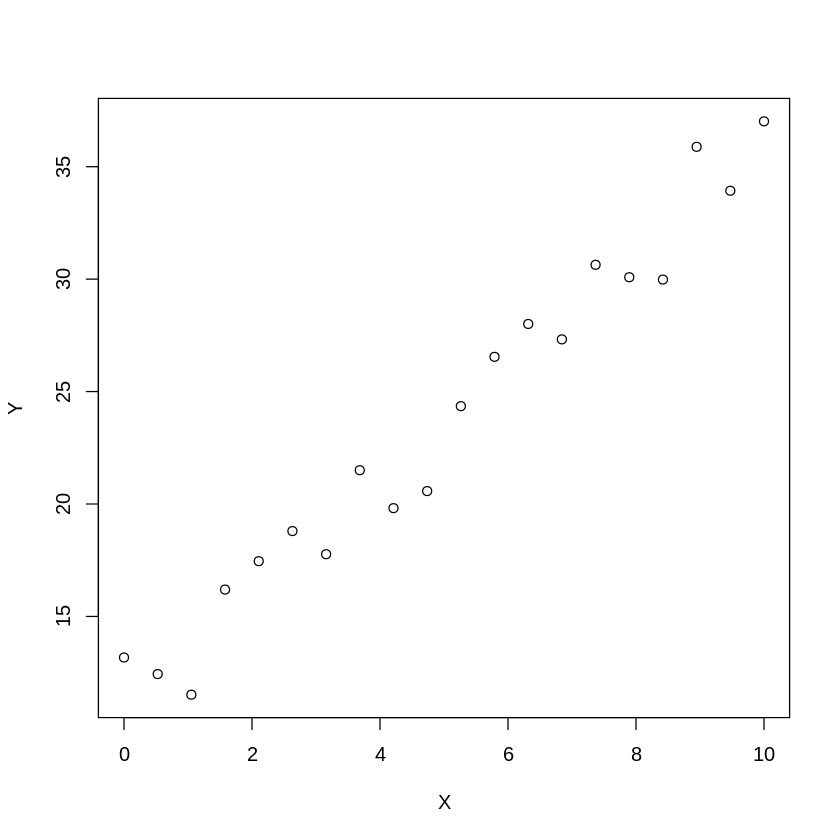

In [2]:
# Simulate some linear data with noise
NObs <- 20
beta0 <- 10.5
beta1 <- 2.6
sigma <- 1.4

X <- seq(0,10,length=NObs)
eps <- rnorm(NObs,0,sigma)

Y <- beta0 + beta1*X +eps

plot(X,Y)

__(a)__ In a loop, repeat the simulation and perform lm estimation, 1000 times. This will yield a distribution of estimates for beta_0 and beta_1. Plot histograms of these. Output the quantiles of these. (Note in reality one would not have this ability.)

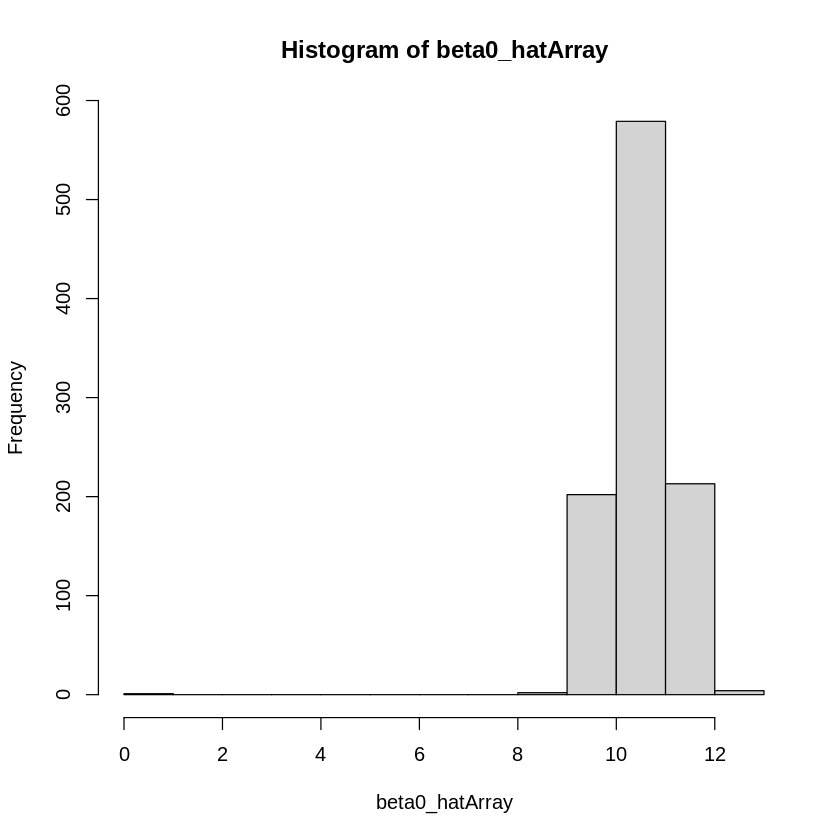

0%      25%      50%      75%     100% 
 0.00000 10.08393 10.50009 10.93381 12.93592

0%      25%      50%      75%     100% 
0.000000 2.531968 2.601307 2.671030 2.901863

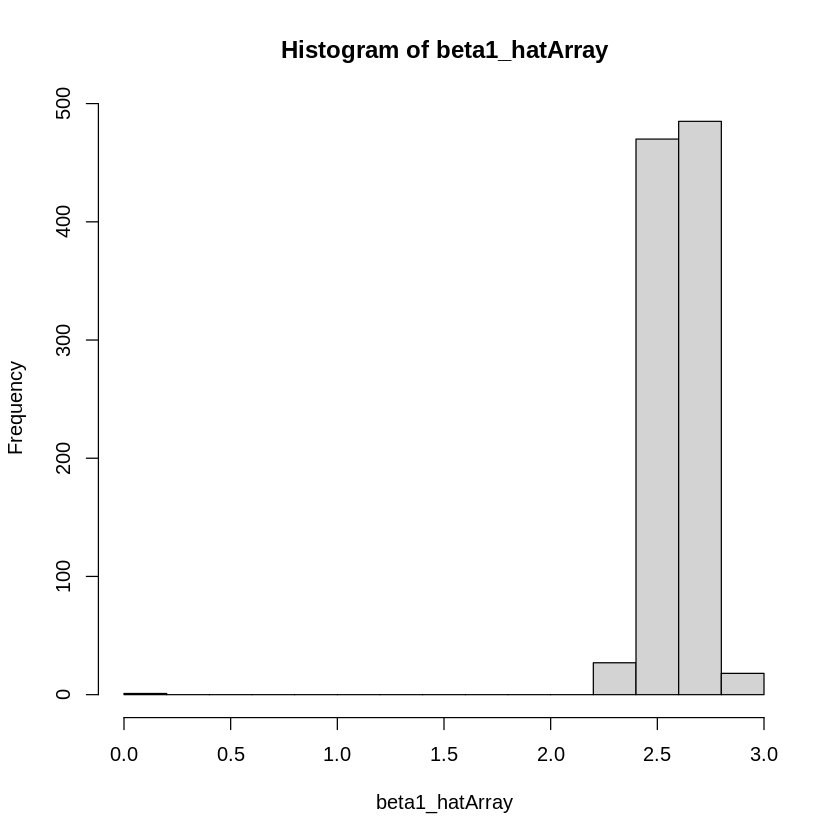

In [4]:
NResample <- 1000

# initialize an array to store all the estimates
beta0_hatArray <-0
beta1_hatArray <-0

for (iResample in 1:NResample){

NObs <- 20
X <- seq(0,10,length=NObs)
    eps <- rnorm(NObs,0,sigma)
    Y <- beta0 + beta1*X +eps

lmfit <- lm(Y~X)
    
    beta0_hatArray <- c(beta0_hatArray, coef(lmfit)[1])
    beta1_hatArray <- c(beta1_hatArray, coef(lmfit)[2])
}

hist(beta0_hatArray)
hist(beta1_hatArray)

quantile(beta0_hatArray)
quantile(beta1_hatArray)

In [87]:
thisFit


Call:
lm(formula = Y_thisSample ~ X_thisSample)

Coefficients:
 (Intercept)  X_thisSample  
      10.514         2.572  


__(b)__ In reality, assume we only have 1 instance (in this example, with NObs=20 data points). 

Perform the simulation once to generate one data set with 20 points.

In [5]:
 NObs <- 20
beta0 <- 10.5
beta1 <- 2.6
sigma <- 1.4
X <- seq(0,10,length=NObs)
eps <- rnorm(NObs,0,sigma)
Y <- beta0 + beta1*X +eps

In [6]:
Y

[1] 12.10720 12.00980 14.11397 15.19425 16.39046 16.99162 21.47342 17.72311
 [9] 22.66512 24.29428 21.71142 25.24166 27.05933 30.62721 28.56219 29.59761
[17] 31.99471 31.98293 33.98045 36.58673

__(c)__ Write code to perform non-parametric bootstrap on this data set. For a linear model like this, the resampling should be random pairs of X,Y data (so, to be clear, the resampling does not mix an X-value with a Y-value it did not belong with). 

Using the distribution of estimates for beta_0 and beta_1 from this non-parametric bootstrap, plot histograms and output quantiles. Compare with the "true" distributions from above.

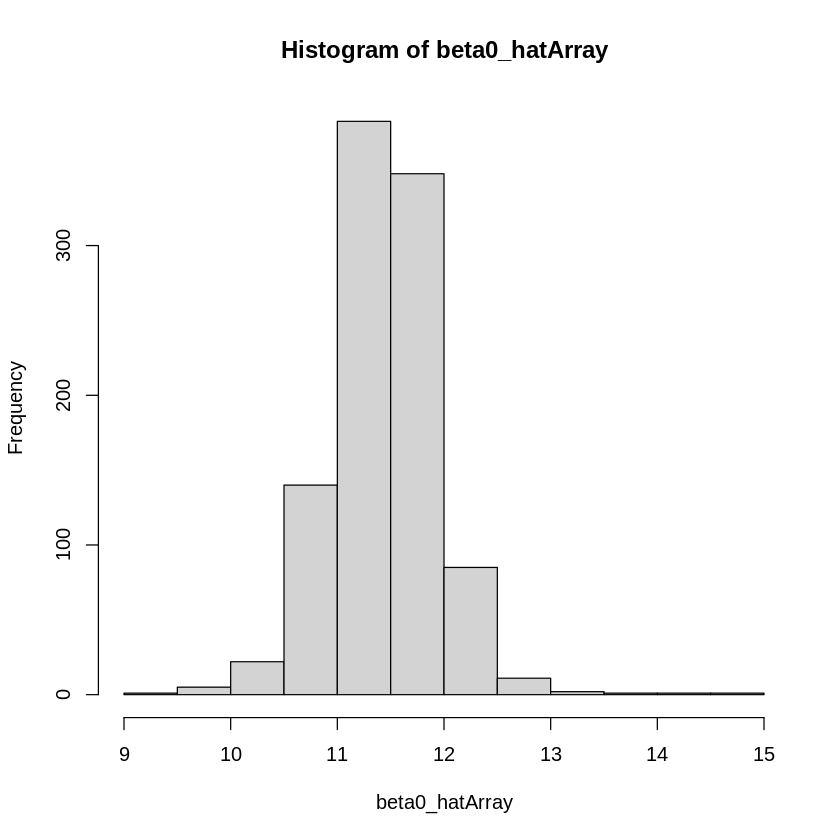

0%       25%       50%       75%      100% 
 9.059488 11.121993 11.440848 11.734515 14.617613

0%      25%      50%      75%     100% 
2.032093 2.371469 2.415532 2.465243 2.731634

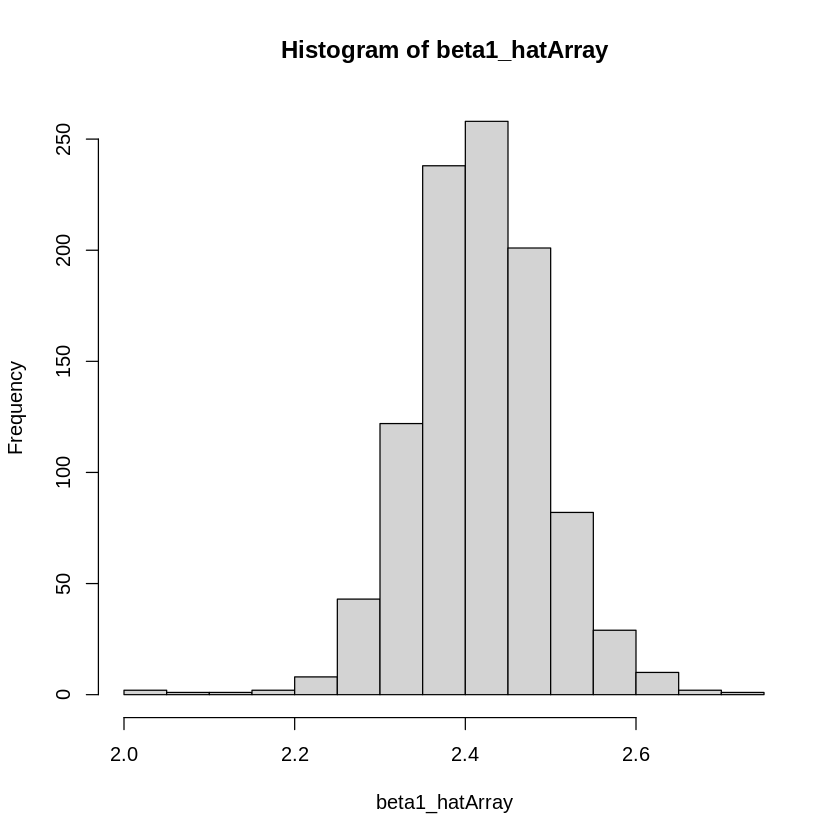

In [7]:
NResample <- 1000

# initialize an array to store all the estimates
beta0_hatArray <-0
beta1_hatArray <-0

for (iResample in 1:NResample){

    thisSampleRows <- sample(NResample, replace = TRUE) # which rows of X and Y to take in this resample
    Y_thisSample = Y[thisSampleRows]
    X_thisSample = X[thisSampleRows]
    
    # parameter estimation technique goes here
    thisFit = lm(Y_thisSample~X_thisSample)
    
    beta0_hatArray[iResample] = coef(thisFit)[1]
    beta1_hatArray[iResample] = coef(thisFit)[2]
    
}

hist(beta0_hatArray)
hist(beta1_hatArray)

quantile(beta0_hatArray)
quantile(beta1_hatArray)

In my opinion this looks more normally distributed than the above distributions.